In [201]:
using StatsBase
using Distributions
using Plots
using Random
using BenchmarkTools

In [202]:
includet("../source/simrankvoting.jl")

In [203]:
n_cans = 6 # number of candidates
n_ranks = 4 # how many rankings for each candidate
n_voters = 100

100

In [204]:
# make an example

ballots_1 = [
    1  2  3  5;
    2  1  3  4;
    1  2  4  3;
    1  2  5  3;
    2  1  4  5;
    2  1  3  4;
    2  1  3  4;
    1  3  4  2;
    3  1  5  4;
    3  4  5  1;
    4  3  2  1;
    4  5  3  2
]

12×4 Matrix{Int64}:
 1  2  3  5
 2  1  3  4
 1  2  4  3
 1  2  5  3
 2  1  4  5
 2  1  3  4
 2  1  3  4
 1  3  4  2
 3  1  5  4
 3  4  5  1
 4  3  2  1
 4  5  3  2

In [205]:
result = countmap(ballots_1[:,1], alg=:dict)

Dict{Int64, Int64} with 4 entries:
  4 => 2
  2 => 4
  3 => 2
  1 => 4

In [206]:
findmin(result)

(2, 4)

In [207]:
find_losers(ballots_1, 1, [result])

(2, [4, 3], [9, 10, 11, 12])

In [208]:
vote_count(ballots_1, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{4 : 2, 2 : 4, 3 : 2, 1 : 4}
Eliminating candidates: [4, 3]
reassigned
{
  4 => 2 : 2,
  3 => 1 : 2,
}
outcome
{2 : 6, 1 : 6}

Step 3: got to exactly 2 candidates
Starting position: Tie!
{2 : 6, 1 : 6}
reassigned
{
  2 => 1 : 5,
  1 => 2 : 4,
}
outcome
{2 : 5, 1 : 7}
Final outcome
{2 : 5, 1 : 7}


([1], [Dict(4 => 2, 2 => 4, 3 => 2, 1 => 4), Dict(2 => 6, 1 => 6), Dict(2 => 5, 1 => 7)])

In [209]:
vote_count(ballots_1)

([1], [Dict(4 => 2, 2 => 4, 3 => 2, 1 => 4), Dict(2 => 6, 1 => 6), Dict(2 => 5, 1 => 7)])

In [210]:
vote_count(ballots_2, quiet=false)


Step 2: got to more than 3 candidates
starting position
Tie!
{2 : 4, 3 : 4, 1 : 4}
reassigned
{
  2 => 3 : 1,
  2 => 1 : 3,
  3 => 1 : 3,
  1 => 2 : 4,
  3 => 2 : 1,
}
outcome
{2 : 5, 3 : 1, 1 : 6}

Step 3: got to more than 3 candidates
Starting position
{2 : 5, 3 : 1, 1 : 6}
Eliminating candidates: [3]
reassigned
{
  3 => 1 : 1,
}
outcome
{2 : 5, 1 : 7}
Final outcome
{2 : 5, 1 : 7}


([1], [Dict(2 => 4, 3 => 4, 1 => 4), Dict(2 => 5, 3 => 1, 1 => 6), Dict(2 => 5, 1 => 7)])

In [211]:
ballots_2 = [
    1  2  3  5;
    1  2  3  4;
    1  2  4  3;
    1  2  5  3;
    2  1  4  5;
    2  1  3  4;
    2  1  3  4;
    2  3  4  1;
    3  1  5  4;
    3  4  5  1;
    3  1  2  4;
    3  5  4  2
]

12×4 Matrix{Int64}:
 1  2  3  5
 1  2  3  4
 1  2  4  3
 1  2  5  3
 2  1  4  5
 2  1  3  4
 2  1  3  4
 2  3  4  1
 3  1  5  4
 3  4  5  1
 3  1  2  4
 3  5  4  2

In [212]:
breakdown(ballots_2, 1)

5×4 Matrix{Int64}:
 4  5  0  2
 4  4  1  1
 4  1  4  2
 0  1  4  5
 0  1  3  2

In [213]:
breakdown(ballots_2, 1.0)

5×4 Matrix{Float64}:
 0.333333  0.416667   0.0        0.166667
 0.333333  0.333333   0.0833333  0.0833333
 0.333333  0.0833333  0.333333   0.166667
 0.0       0.0833333  0.333333   0.416667
 0.0       0.0833333  0.25       0.166667

In [214]:
ballots_3 = setup_ballots(prs,n_voters=10_000_000, n_cans=n_cans, n_ranks=n_ranks)

10000000×4 Matrix{Int64}:
 6  1  2  3
 3  4  5  6
 5  6  1  2
 2  3  4  5
 4  5  6  1
 6  1  2  3
 1  2  3  4
 3  4  5  6
 1  2  3  4
 4  5  6  1
 5  6  1  2
 1  2  3  4
 3  4  5  6
 ⋮        
 1  2  3  4
 1  2  3  4
 2  3  4  5
 6  1  2  3
 5  6  1  2
 3  4  5  6
 1  2  3  4
 4  5  6  1
 3  4  5  6
 4  5  6  1
 1  2  3  4
 4  5  6  1

In [215]:
vote_count(ballots_3)

([1], [Dict(5 => 1204494, 4 => 1544065, 6 => 913394, 2 => 2191220, 3 => 1900329, 1 => 2246498), Dict(5 => 1204494, 4 => 1544065, 2 => 2191220, 3 => 1900329, 1 => 3159892), Dict(4 => 0, 2 => 2191220, 3 => 1900329, 1 => 4703957)])

In [216]:
ballots_4 = [
    1  2  3  5;
    1  2  3  4;
    1  2  4  3;
    2  1  4  5;
    2  1  3  4;
    3  1  5  4;
    3  4  5  1;
    4  3  2  5;
    4  2  1  5;
    5  1  2  4;
    5  3  2  4
]

11×4 Matrix{Int64}:
 1  2  3  5
 1  2  3  4
 1  2  4  3
 2  1  4  5
 2  1  3  4
 3  1  5  4
 3  4  5  1
 4  3  2  5
 4  2  1  5
 5  1  2  4
 5  3  2  4

In [217]:
vote_count(ballots_4, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{5 : 2, 4 : 2, 2 : 2, 3 : 2, 1 : 3}



*** BREAK TIE AMONG LOSERS ***

Step 2: got to more than 3 candidates
starting position
Tie!
{5 : 2, 4 : 2, 2 : 2, 3 : 2}
reassigned
{
  2 => 3 : 1,
  4 => 2 : 1,
  5 => 2 : 1,
  2 => 4 : 1,
  3 => 5 : 1,
  3 => 4 : 1,
  4 => 3 : 1,
  5 => 3 : 1,
}
outcome
{5 : 1, 4 : 2, 2 : 2, 3 : 3}

Step 3: got to more than 3 candidates
Starting position
{5 : 1, 4 : 2, 2 : 2, 3 : 3}
Eliminating candidates: [5]
reassigned
{}
outcome
{4 : 2, 2 : 2, 3 : 3}
Final outcome
{4 : 2, 2 : 2, 3 : 3}
*** RETURN LOSERS AFTER TIE BROKEN ***



Eliminating candidates: [5, 4, 2]
reassigned
{
  2 => 1 : 2,
  4 => 3 : 1,
  4 => 1 : 1,
  5 => 3 : 1,
  5 => 1 : 1,
}
outcome
{3 : 4, 1 : 7}
Final outcome
{3 : 4, 1 : 7}


([1], [Dict(5 => 2, 4 => 2, 2 => 2, 3 => 2, 1 => 3), Dict(3 => 4, 1 => 7)])

In [218]:
countmap(ballots_4[4:11,1:2], alg=:dict)

Dict{Int64, Int64} with 5 entries:
  5 => 2
  4 => 3
  2 => 3
  3 => 4
  1 => 4

In [219]:
countmap(ballots_4[4:11,1:2], alg=:dict)

Dict{Int64, Int64} with 5 entries:
  5 => 2
  4 => 3
  2 => 3
  3 => 4
  1 => 4

In [220]:
ballots_5 = [
    1  2  3  5;
    1  2  3  4;
    1  2  4  3;
    2  3  4  5;
    2  3  5  4;
    3  2  5  4;
    3  4  5  1;
    4  3  2  5;
    4  3  1  5;
    5  3  2  4;
    5  3  2  4
]

11×4 Matrix{Int64}:
 1  2  3  5
 1  2  3  4
 1  2  4  3
 2  3  4  5
 2  3  5  4
 3  2  5  4
 3  4  5  1
 4  3  2  5
 4  3  1  5
 5  3  2  4
 5  3  2  4

In [221]:
vote_count(ballots_5, quiet = false)


Step 2: got to more than 3 candidates
Starting position
{5 : 2, 4 : 2, 2 : 2, 3 : 2, 1 : 3}



*** BREAK TIE AMONG LOSERS ***

Step 2: got to more than 3 candidates
starting position
Tie!
{5 : 2, 4 : 2, 2 : 2, 3 : 2}
reassigned
{
  2 => 3 : 2,
  3 => 4 : 1,
  4 => 3 : 2,
  3 => 2 : 1,
  5 => 3 : 2,
}
outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}
Final outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}
*** RETURN LOSERS AFTER TIE BROKEN ***



Eliminating candidates: [5, 4, 2]
reassigned
{
  2 => 3 : 2,
  4 => 3 : 2,
  5 => 3 : 2,
}
outcome
{3 : 8, 1 : 3}
Final outcome
{3 : 8, 1 : 3}


([3], [Dict(5 => 2, 4 => 2, 2 => 2, 3 => 2, 1 => 3), Dict(3 => 8, 1 => 3)])

In [222]:
countmap(ballots_5[:,1:3],alg=:dict)

Dict{Int64, Int64} with 5 entries:
  5 => 5
  4 => 5
  2 => 9
  3 => 10
  1 => 4

In [223]:
ballots_6 = [
  1   3   2;
  2   1   3;
  3   2   1;
  1   3   2;
  2   1   3
]

5×3 Matrix{Int64}:
 1  3  2
 2  1  3
 3  2  1
 1  3  2
 2  1  3

In [224]:
ballots_6b = [
  1   3   0;
  2   1   3;
  3   0   0;
  1   3   0;
  2   1   3
]

5×3 Matrix{Int64}:
 1  3  0
 2  1  3
 3  0  0
 1  3  0
 2  1  3

In [225]:
ballots_6c = [
  1   2   0;
  2   1   0;
  3   0   0;
  1   2   0;
  2   1   0;
]

5×3 Matrix{Int64}:
 1  2  0
 2  1  0
 3  0  0
 1  2  0
 2  1  0

In [226]:
vote_count(ballots_6, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{2 : 2, 3 : 1, 1 : 2}
Eliminating candidates: [3]
reassigned
{
  3 => 2 : 1,
}
outcome
{2 : 3, 1 : 2}
Final outcome
{2 : 3, 1 : 2}


([2], [Dict(2 => 2, 3 => 1, 1 => 2), Dict(2 => 3, 1 => 2)])

In [227]:
vote_count(ballots_6b, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{2 : 2, 3 : 1, 1 : 2}
Eliminating candidates: [3]
reassigned
{}
outcome
{2 : 2, 1 : 2}

Step 3: got to exactly 2 candidates
Starting position: Tie!
{2 : 2, 1 : 2}
reassigned
{
  2 => 1 : 2,
}
outcome
{2 : 0, 1 : 4}
Final outcome
{2 : 0, 1 : 4}


([1], [Dict(2 => 2, 3 => 1, 1 => 2), Dict(2 => 2, 1 => 2), Dict(2 => 0, 1 => 4)])

In [228]:
vote_count(ballots_6c, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{2 : 2, 3 : 1, 1 : 2}
Eliminating candidates: [3]
reassigned
{}
outcome
{2 : 2, 1 : 2}

Step 3: got to exactly 2 candidates
Starting position: Tie!
{2 : 2, 1 : 2}
reassigned
{
  2 => 1 : 2,
  1 => 2 : 2,
}
outcome
{2 : 2, 1 : 2}
Final outcome
{2 : 2, 1 : 2}


([2, 1], [Dict(2 => 2, 3 => 1, 1 => 2), Dict(2 => 2, 1 => 2), Dict(2 => 2, 1 => 2)])

In [229]:
ballots_7 = [
  1  2  3;
  1  2  3;
  1  3  2;
  2  3  1;
  2  3  1;
  2  3  1;
  3  2  1;
  3  2  1;
]

8×3 Matrix{Int64}:
 1  2  3
 1  2  3
 1  3  2
 2  3  1
 2  3  1
 2  3  1
 3  2  1
 3  2  1

In [230]:
vote_count(ballots_7, quiet=false)


Step 2: got to more than 3 candidates
Starting position
{2 : 3, 3 : 2, 1 : 3}
Eliminating candidates: [3]
reassigned
{
  3 => 2 : 2,
}
outcome
{2 : 5, 1 : 3}
Final outcome
{2 : 5, 1 : 3}


([2], [Dict(2 => 3, 3 => 2, 1 => 3), Dict(2 => 5, 1 => 3)])

In [231]:
ballots_5

11×4 Matrix{Int64}:
 1  2  3  5
 1  2  3  4
 1  2  4  3
 2  3  4  5
 2  3  5  4
 3  2  5  4
 3  4  5  1
 4  3  2  5
 4  3  1  5
 5  3  2  4
 5  3  2  4

In [232]:
vote_count(ballots_5,quiet=false)


Step 2: got to more than 3 candidates
Starting position
{5 : 2, 4 : 2, 2 : 2, 3 : 2, 1 : 3}



*** BREAK TIE AMONG LOSERS ***

Step 2: got to more than 3 candidates
starting position
Tie!
{5 : 2, 4 : 2, 2 : 2, 3 : 2}
reassigned
{
  2 => 3 : 2,
  3 => 4 : 1,
  4 => 3 : 2,
  3 => 2 : 1,
  5 => 3 : 2,
}
outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}
Final outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}
*** RETURN LOSERS AFTER TIE BROKEN ***



Eliminating candidates: [5, 4, 2]
reassigned
{
  2 => 3 : 2,
  4 => 3 : 2,
  5 => 3 : 2,
}
outcome
{3 : 8, 1 : 3}
Final outcome
{3 : 8, 1 : 3}


([3], [Dict(5 => 2, 4 => 2, 2 => 2, 3 => 2, 1 => 3), Dict(3 => 8, 1 => 3)])

# Create rank distribution vectors

In [233]:
n_cans = 6 # number of candidates
n_ranks = 4 # how many rankings for each candidate
n_voters = 100

100

In [234]:
r = 2  #  rth success
p = 0.35  #  probability of success in a given trial
# outcome is number of failures before the rth success
nb = NegativeBinomial(r,p)
pd = [pdf(nb,i) for i in 1:n_cans]
sum(pd)

0.7083731377734374

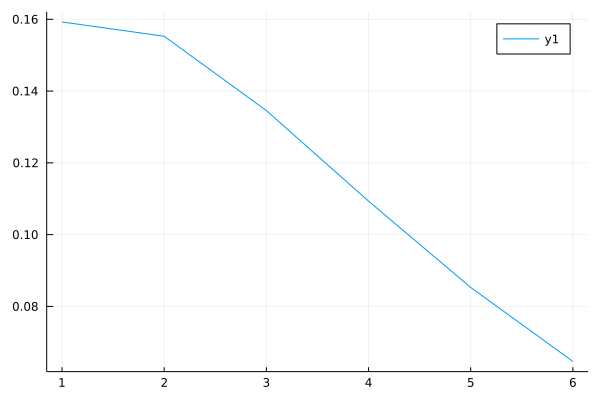

In [235]:
plot(pd)

In [236]:
pd

6-element Vector{Float64}:
 0.15924999999999992
 0.15526874999999998
 0.13456624999999997
 0.109335078125
 0.08528136093749991
 0.06467169871093754

In [237]:
pd[:] = pd[1:end] ./ sum(pd[1:end])

6-element Vector{Float64}:
 0.2248108962750274
 0.2191906238681518
 0.18996520735239822
 0.15434673097382356
 0.12039045015958226
 0.09129609137101671

In [238]:
sum(pd)

0.9999999999999999

In [239]:
reverse(pd)

6-element Vector{Float64}:
 0.09129609137101671
 0.12039045015958226
 0.15434673097382356
 0.18996520735239822
 0.2191906238681518
 0.2248108962750274

In [240]:
pd = nbtrials()

6×4 Matrix{Float64}:
 0.224811   0.0912961  0.12039    0.154347
 0.219191   0.224811   0.0912961  0.12039
 0.189965   0.219191   0.224811   0.0912961
 0.154347   0.189965   0.219191   0.224811
 0.12039    0.154347   0.189965   0.219191
 0.0912961  0.12039    0.154347   0.189965

In [241]:
hcat([circshift(pd,i) for i in 0:n_ranks-1]...)

6×16 Matrix{Float64}:
 0.224811   0.0912961  0.12039    …  0.189965   0.219191   0.224811
 0.219191   0.224811   0.0912961     0.154347   0.189965   0.219191
 0.189965   0.219191   0.224811      0.12039    0.154347   0.189965
 0.154347   0.189965   0.219191      0.0912961  0.12039    0.154347
 0.12039    0.154347   0.189965      0.224811   0.0912961  0.12039
 0.0912961  0.12039    0.154347   …  0.219191   0.224811   0.0912961

In [242]:
prs = nbtrials(r=2, p=0.35, n_cans=6, n_ranks=4)

6×4 Matrix{Float64}:
 0.224811   0.0912961  0.12039    0.154347
 0.219191   0.224811   0.0912961  0.12039
 0.189965   0.219191   0.224811   0.0912961
 0.154347   0.189965   0.219191   0.224811
 0.12039    0.154347   0.189965   0.219191
 0.0912961  0.12039    0.154347   0.189965

In [243]:
countmap(categorical_sim(prs[:,1], n_voters))

Dict{Int64, Int64} with 6 entries:
  5 => 15
  4 => 11
  6 => 6
  2 => 26
  3 => 21
  1 => 21

## use code to create runoff for tied "losers"

In [244]:
bsub = ballots_5[4:11,1:2]
res = countmap(bsub[:,1])
useranks = fill(1,8)

8-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1

In [245]:
w = vote_count(bsub, quiet=true, stopstep=2)

([3], [Dict(5 => 2, 4 => 2, 2 => 2, 3 => 2), Dict(5 => 0, 4 => 1, 2 => 1, 3 => 6)])

In [246]:
w[1]

1-element Vector{Int64}:
 3

In [247]:
d = Dict(5=>0,4=>1,2=>1,3=>6)

Dict{Int64, Int64} with 4 entries:
  5 => 0
  4 => 1
  2 => 1
  3 => 6

In [248]:
@time kd = keys(d)

  0.000005 seconds (1 allocation: 16 bytes)


KeySet for a Dict{Int64, Int64} with 4 entries. Keys:
  5
  4
  2
  3

In [249]:
fieldnames(typeof(kd))

(:dict,)

In [250]:
@show Base.summarysize(kd) 
@show Base.summarysize(d)

Base.summarysize(kd) = 464
Base.summarysize(d) = 456


456

In [251]:
typeof(values(d))

Base.ValueIterator{Dict{Int64, Int64}}

In [252]:
maxv = -typemin(Int)
maxk = 0
for pr in d
    if pr[2] > maxv
        maxv = pr[2]; maxk = pr[1]
    end
end
(maxk, maxv)
>(6,3)

true

In [253]:
function dictcomp(dd, op)
    selv = if op == < 
        typemax(valtype(dd)) 
    elseif op == >
        typemin(valtype(dd))
    else
        @assert false "Op must be > or <"
    end
    selk = 0
    for pr in dd
        if op(pr[2],selv)
            selv = pr[2]; selk = pr[1]
        end
    end
    return selk=>selv
end

dictcomp (generic function with 1 method)

In [254]:
eltype(d)

Pair{Int64, Int64}

In [255]:
eltype(ans)

Int64

In [256]:
findall(indexin(ballots_5[:,1], [2,3,4,5]) .!= nothing)

8-element Vector{Int64}:
  4
  5
  6
  7
  8
  9
 10
 11

In [257]:
losers = [4,5,3,2]
pos = findall(indexin(losers, [3]) .!= nothing)
deleteat!(losers, pos)

3-element Vector{Int64}:
 4
 5
 2

In [258]:
result5 = countmap(ballots_5[:,1], alg=:dict)

Dict{Int64, Int64} with 5 entries:
  5 => 2
  4 => 2
  2 => 2
  3 => 2
  1 => 3

In [259]:
find_losers(ballots_5, 1, [result5])


Step 2: got to more than 3 candidates
starting position
Tie!
{5 : 2, 4 : 2, 2 : 2, 3 : 2}
reassigned
{
  2 => 3 : 2,
  3 => 4 : 1,
  4 => 3 : 2,
  3 => 2 : 1,
  5 => 3 : 2,
}
outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}
Final outcome
{5 : 0, 4 : 1, 2 : 1, 3 : 6}


(2, [5, 4, 2], [4, 5, 8, 9, 10, 11])